# EDA

## Import libs

In [33]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2

from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path")

import src.load_libs 
from src.load_data import load_stroke_data 


## Loading Dataset

In [34]:
print("Loading data...")
df = load_stroke_data()
display(df.head())
df.info()

Loading data...
Attempting to load file: healthcare-dataset-stroke-data.csv from dataset fedesoriano/stroke-prediction-dataset
Dataset loaded successfully!


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Well, at first look we can see that :  
- The target variable is binary (stroke 1/0).  
- We have also numerical and categorical features.

## Dataset stats

In [35]:
# %%
# infos
if df is not None:
    print("------ ------")
    print("General Information:") # Modifié
    print("------ ------")
    df.info()

    # Missing values
    print("\n------ ------")
    print("Missing Values (%)") # Modifié
    print("------ ------")
    missing_values = df.isnull().sum()
    missing_percent = (missing_values / len(df)) * 100
    if missing_percent.sum() > 0:
        display(missing_percent[missing_percent > 0])
    else:
        # Garder la cohérence, même si pas de titre ici
        print("No missing values.") # Modifié

    # Duplicate lines
    print("\n------ ------")
    duplicate_rows = df.duplicated().sum()
    print(f"Duplicate Lines: {duplicate_rows}") # Modifié
    print("------ ------")


    # Unique values per column in %
    print("\n------ ------")
    print("Unique Values per Column (%)") # Modifié
    print("------ ------")
    unique_counts = df.nunique().sort_values()
    unique_counts = unique_counts/len(df) * 100
    display(unique_counts)

    # Data types (Descriptive stats)
    print("\n------ ------")
    print("Descriptive Statistics (Numerical)") # Modifié
    print("------ ------")
    display(df.describe())

else:
    print("DataFrame not loaded.") # Modifié


------ ------
General Information:
------ ------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

------ ------
Missing Values (%)
------ ------


bmi    3.933464
dtype: float64


------ ------
Duplicate Lines: 0
------ ------

------ ------
Unique Values per Column (%)
------ ------


hypertension           0.039139
heart_disease          0.039139
ever_married           0.039139
Residence_type         0.039139
stroke                 0.039139
gender                 0.058708
smoking_status         0.078278
work_type              0.097847
age                    2.035225
bmi                    8.180039
avg_glucose_level     77.866928
id                   100.000000
dtype: float64


------ ------
Descriptive Statistics (Numerical)
------ ------


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Dataset is pretty clean,  
- no missing values  
- no outliers  
- no duplicates  
- no need for any preprocessing  

Except for bmi, (almost 4% of the data is missing), we can fill it with the median.

## Visual Univariate Analysis

Numerical columns: ['age', 'avg_glucose_level', 'bmi']

Analyzing 'age'


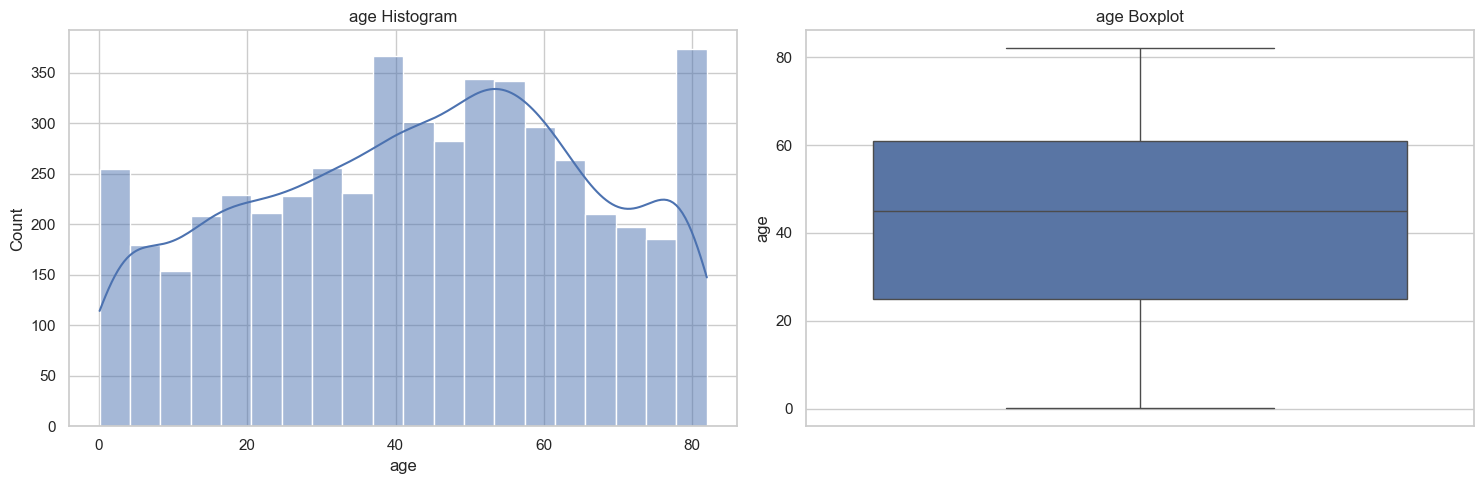


Analyzing 'avg_glucose_level'


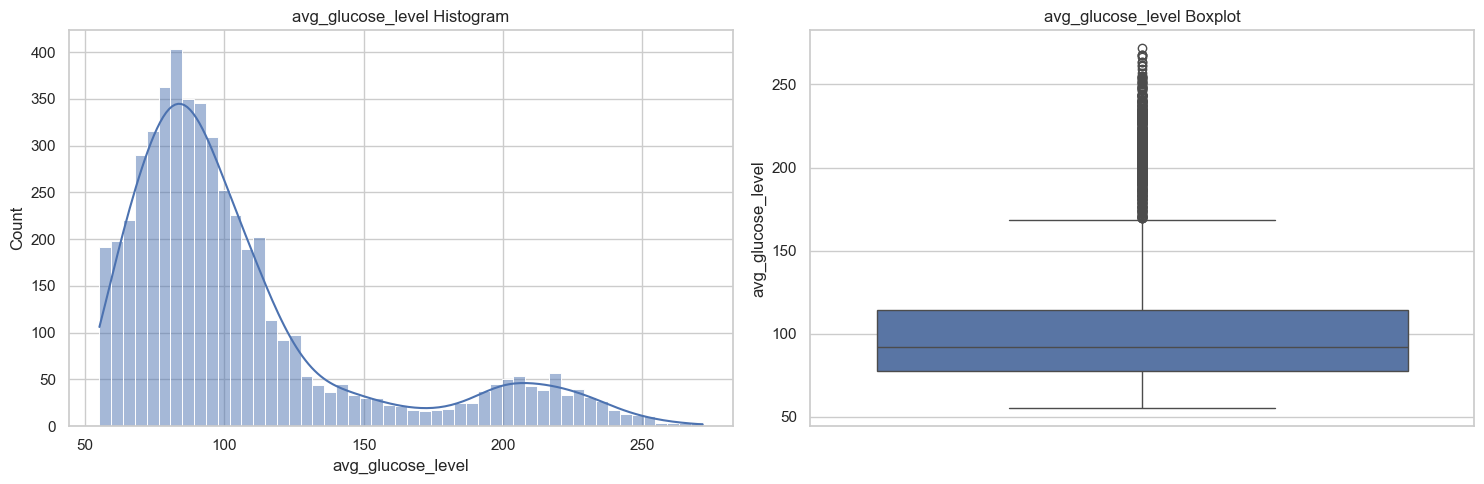


Analyzing 'bmi'


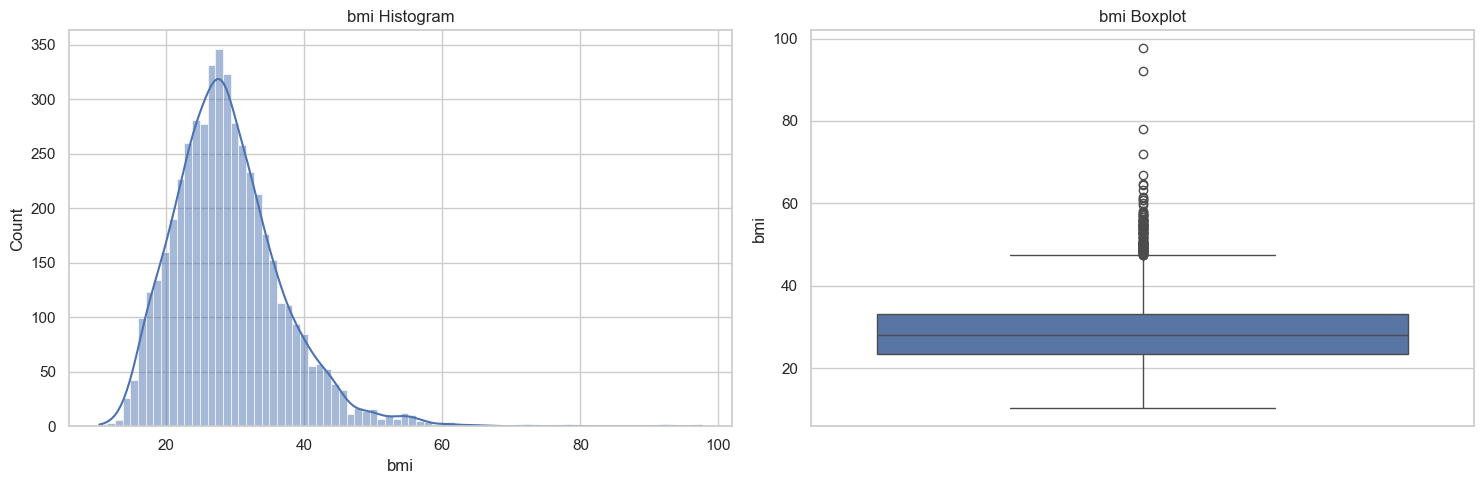

In [39]:
if df is not None:
    # Select numerical columns, excluding specific categorical ones
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    exclude_cols = ['id', 'stroke', 'hypertension', 'heart_disease']
    numerical_cols = [col for col in numerical_cols if col not in exclude_cols]
    print(f"Numerical columns: {numerical_cols}")

    # Plot histograms and boxplots for numerical columns
    for col in numerical_cols:
        print(f"\nAnalyzing '{col}'")
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram with KDE
        sns.histplot(df[col], kde=True, ax=ax1)
        ax1.set_title(f'{col} Histogram')

        # Boxplot
        sns.boxplot(y=df[col], ax=ax2)
        ax2.set_title(f'{col} Boxplot')

        plt.tight_layout()
        plt.show()

Categorical columns to analyze: ['id', 'stroke', 'hypertension', 'heart_disease']

--- Distribution of 'id' ---


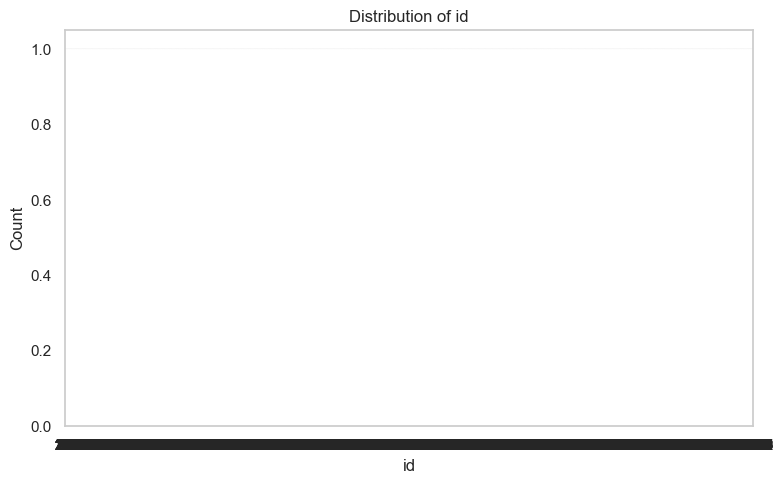


--- Distribution of 'stroke' ---


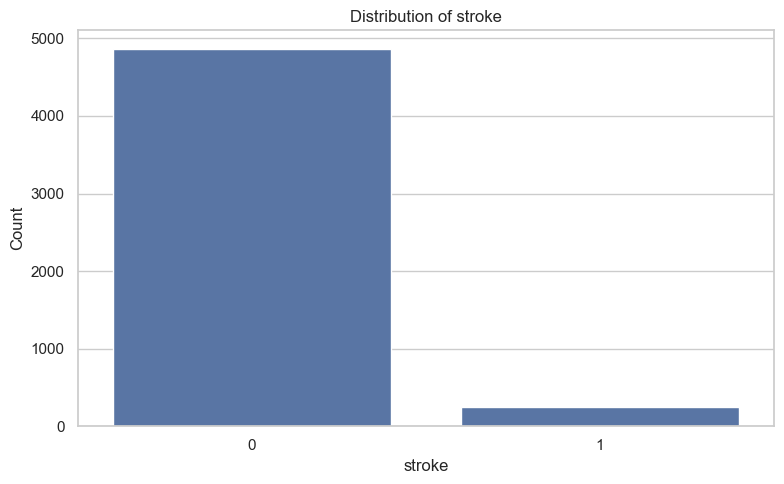


--- Distribution of 'hypertension' ---


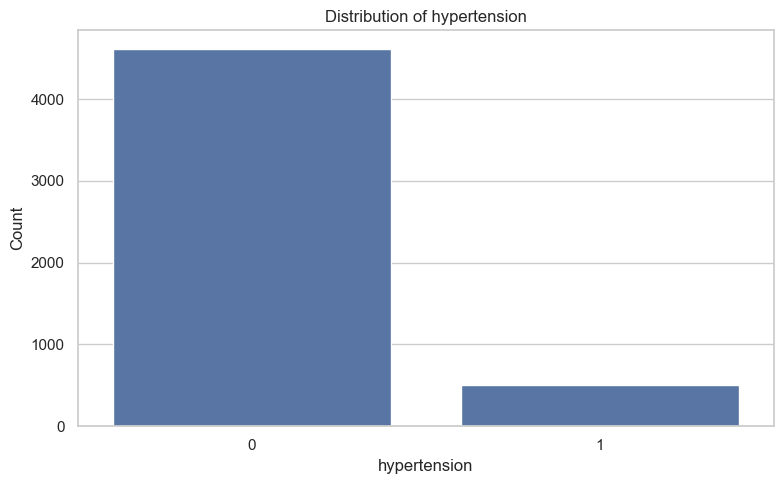


--- Distribution of 'heart_disease' ---


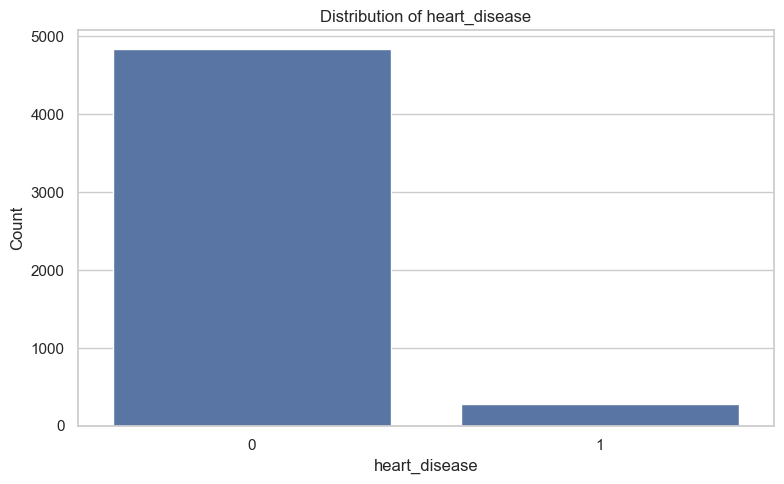

In [42]:
# Define categorical columns
all_categorical_cols = ['id', 'stroke', 'hypertension', 'heart_disease']

# Analyze distribution of categorical columns
if df is not None:
    print(f"Categorical columns to analyze: {all_categorical_cols}")

    for col in all_categorical_cols:
        print(f"\n--- Distribution of '{col}' ---")
        plt.figure(figsize=(8, 5))
        
        # Count plot for categorical variable
        sns.countplot(x=df[col])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        
        plt.tight_layout()
        plt.show()

Apparently, here the features that might be more effective to be a cause of stroke : **heart_disease**, **hypertension**, **formerly_smoked**, **self-employed**

In [38]:
if df is not None:
    # Use the numerical_cols list defined earlier (age, avg_glucose_level, bmi)
    correlation_matrix = df[numerical_cols].corr()

    print("Correlation Matrix:")
    display(correlation_matrix)

    # Visualize the correlation matrix as a heatmap
    load_libs.plt.figure(figsize=(8, 6))
    load_libs.sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    load_libs.plt.title('Correlation Matrix of Numerical Features')
    load_libs.plt.show()

Correlation Matrix:


,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


NameError: name 'load_libs' is not defined

Mmm... not really goods values here, only < 0.3 so not enough to say anything.  
And correlation matrice is only for linear models, but it's not our goal here.